<a href="https://colab.research.google.com/github/Prabhu-Tejas/Covid-Detection-model/blob/main/Covid_detetection_using_chest_x_ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import zipfile
import io
import numpy as np
from PIL import Image
import os
import random
import shutil
import tensorflow as tf

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load zip file
zip_path = "/content/drive/MyDrive/Covid detection using chest x-ray/Covid dataset.zip"
zip_path

'/content/drive/MyDrive/Covid detection using chest x-ray/Covid dataset.zip'

In [13]:
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall("/content/drive/MyDrive/Covid detection using chest x-ray/Covid dataset")

In [14]:

# Set the paths for the input and output folders
input_folder = "/content/drive/MyDrive/Covid detection using chest x-ray/Covid dataset/COVID"
output_folder = "/content/drive/MyDrive/Covid detection using chest x-ray/validation/COVID"

# Get the list of image files in the input folder
image_files = [f for f in os.listdir(input_folder) if f.endswith(".jpg") or f.endswith(".png")]

# Calculate the number of images to move to the output folder
num_images = len(image_files)
num_move = int(num_images * 0.2)

# Randomly select the images to move
images_to_move = random.sample(image_files, num_move)

# Move the selected images to the output folder
for image_file in images_to_move:
    src_path = os.path.join(input_folder, image_file)
    dst_path = os.path.join(output_folder, image_file)
    shutil.move(src_path, dst_path)


In [15]:

# Set the paths for the input and output folders
input_folder = "/content/drive/MyDrive/Covid detection using chest x-ray/Covid dataset/non-COVID"
output_folder = "/content/drive/MyDrive/Covid detection using chest x-ray/validation/non-COVID"

# Get the list of image files in the input folder
image_files = [f for f in os.listdir(input_folder) if f.endswith(".jpg") or f.endswith(".png")]

# Calculate the number of images to move to the output folder
num_images = len(image_files)
num_move = int(num_images * 0.2)

# Randomly select the images to move
images_to_move = random.sample(image_files, num_move)

# Move the selected images to the output folder
for image_file in images_to_move:
    src_path = os.path.join(input_folder, image_file)
    dst_path = os.path.join(output_folder, image_file)
    shutil.move(src_path, dst_path)


In [6]:
# Define paths to dataset
train_dir = "/content/drive/MyDrive/Covid detection using chest x-ray/Covid dataset"
validation_dir = "/content/drive/MyDrive/Covid detection using chest x-ray/validation"



In [7]:
# Load and preprocess dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)


In [8]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')



Found 1927 images belonging to 2 classes.


In [9]:
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

Found 482 images belonging to 2 classes.


In [10]:
# Build model using ResNet50
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

base_model = ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)


94765736/94765736 [==============================] - 5s 0us/step


In [11]:
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
prediction = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=prediction)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [13]:
# Train model and saving best model to checkpoint
from tensorflow.keras.callbacks import ModelCheckpoint

# Define checkpoint callback
checkpoint_filepath = '/content/drive/MyDrive/Covid detection using chest x-ray/detectionmodel.h5'


In [14]:
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      save_weights_only=False)




In [17]:
# Train the model with checkpoint callback
model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    callbacks=[checkpoint_callback]
)

Epoch 1/15
61/61 [==============================] - 34s 559ms/step - loss: 0.4172 - accuracy: 0.8085 - val_loss: 0.4633 - val_accuracy: 0.7905
Epoch 2/15
61/61 [==============================] - 35s 574ms/step - loss: 0.3851 - accuracy: 0.8282 - val_loss: 0.4087 - val_accuracy: 0.8237
Epoch 3/15
61/61 [==============================] - 34s 550ms/step - loss: 0.4283 - accuracy: 0.8127 - val_loss: 0.3781 - val_accuracy: 0.8320
Epoch 4/15
61/61 [==============================] - 36s 596ms/step - loss: 0.4712 - accuracy: 0.7846 - val_loss: 0.3578 - val_accuracy: 0.8402
Epoch 5/15
61/61 [==============================] - 36s 589ms/step - loss: 0.3877 - accuracy: 0.8267 - val_loss: 0.3836 - val_accuracy: 0.8278
Epoch 6/15
61/61 [==============================] - 34s 550ms/step - loss: 0.3564 - accuracy: 0.8490 - val_loss: 0.3841 - val_accuracy: 0.8237
Epoch 7/15
61/61 [==============================] - 34s 550ms/step - loss: 0.3705 - accuracy: 0.8417 - val_loss: 0.3614 - val_accuracy: 0.8382

In [18]:
# Load the saved model
model = tf.keras.models.load_model("/content/drive/MyDrive/Covid detection using chest x-ray/detectionmodel.h5")



In [19]:
# Evaluate the model on the test dataset
val_loss, val_accuracy = model.evaluate(validation_generator)

# Print the test accuracy
print("validation Accuracy:", val_accuracy)


16/16 [==============================] - 4s 185ms/step - loss: 0.3502 - accuracy: 0.8444
validation Accuracy: 0.8443983197212219


In [20]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [23]:
print(validation_generator.class_indices)

{'COVID': 0, 'non-COVID': 1}


In [25]:
test = cv2.imread('/content/drive/MyDrive/Covid detection using chest x-ray/test/Non-Covid (1184).png')

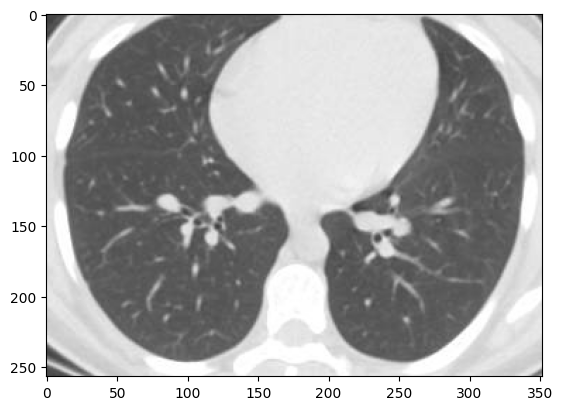

In [27]:
import matplotlib.pyplot as plt
plt.imshow(test)

In [32]:
test=np.expand_dims(test,axis=0)

In [33]:
test.shape

(1, 1, 257, 352, 3)

In [35]:
test = cv2.resize(test, (224,224))

error: ignored

In [31]:
print(model.predict(test))

ValueError: ignored

In [62]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# Set the path to the test image
image_path = '/content/drive/MyDrive/Covid detection using chest x-ray/test/Non-Covid (1184).png'


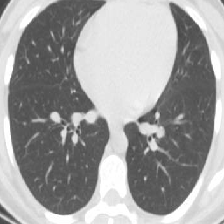

In [63]:
# Load the test image
image = load_img(image_path, target_size=(224, 224))
image

In [64]:
# Resize the image and convert it to an array
resized_image = image.resize((224, 224))
image_array = img_to_array(resized_image)


In [65]:
# Preprocess the image
preprocessed_image = preprocess_input(image_array)

In [66]:
# Expand dimensions to match the expected input shape
preprocessed_image = np.expand_dims(preprocessed_image, axis=0)


In [67]:
# Make predictions on the preprocessed image
predictions = model.predict(preprocessed_image)

predictions



1/1 [==============================] - 0s 23ms/step


array([[1.]], dtype=float32)

In [74]:
# Set the path to the test image
image_path_cov = "/content/drive/MyDrive/Covid detection using chest x-ray/test/Covid (1127).png"

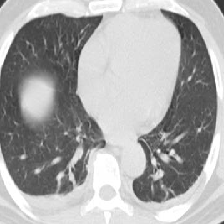

In [75]:
# Load the test image
image_cov = load_img(image_path_cov, target_size=(224, 224))
image_cov

In [76]:
# Resize the image and convert it to an array
resized_image_cov = image_cov.resize((224, 224))
image_array_cov = img_to_array(resized_image)


In [77]:
# Preprocess the image
preprocessed_image_cov = preprocess_input(image_array_cov)

In [78]:
# Expand dimensions to match the expected input shape
preprocessed_image_cov = np.expand_dims(preprocessed_image_cov, axis=0)


In [81]:
# Make predictions on the preprocessed image
predictions_cov = model.predict(preprocessed_image_cov)

predictions_cov



1/1 [==============================] - 0s 23ms/step


array([[1.]], dtype=float32)